# Worksheet 12

Name:  Tian Tan  
UID: U68023245

### Topics

- Support Vector Machines

### Support Vector Machines

a) Consider the following dataset:

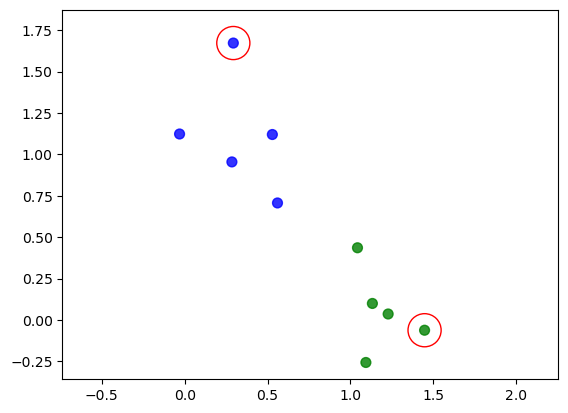

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0) # 10 points
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X]) # (a,b) if a>b label as 1, else 0

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[0][0], X[0][1]), .1, color='r',fill=False))
ax.add_patch(plt.Circle((X[1][0], X[1][1]), .1, color='r',fill=False))
plt.show()

if we fit an SVM to the above dataset, moved the points circled in red, and re-fit the SVM, describe how the fit would change depending on how the points are moved.

Since these two points don’t contribute, if we were to move them they would not affect the decision boundary. Thus the fit won't change.

b) If we were to fit an SVM to the above dataset, which points do you think would be the support vectors? Circle them in red.

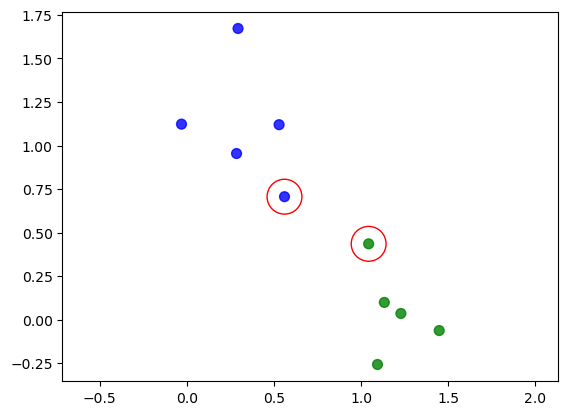

In [12]:
centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0) # 10 points
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X]) # (a,b) if a>b label as 1, else 0

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((1.04321307,  0.43628205), .1, color='r',fill=False))
ax.add_patch(plt.Circle((0.5602674,   0.70681664), .1, color='r',fill=False))
plt.show()

c) Consider the following dataset containing only two points: `{(0,0), (4,4)}`. We can see that the line `y = -x + 4` separates the data. But the `w` is not right for SVM. Similar to what we did in class, compute the `w` that creates the widest street.

As we known: h = -x + 4 = 0, w = -1, b = 4; The street is: -cx + 4c = 0  
Assume x1 = (4,4) is positive, that is y1 = +1. Then x0 = (0,0) is negative, y0 = -1.  
For x1: y1 * (-c*x1 + 4c) - 1 = 0 => (-4c - 4c + 4c) - 1 = 0  

For x0: y0 * (-c*x0 + 4c) - 1 = 0 => -(0 + 0 + 4c) - 1 = 0  

Then we get: -4c = 1 => c = -1/4  
Thus, -1/4 * (-1) * x + (-1/4) * 4 = 0  
Thus, w = 1/4, it will create the widest street.

d) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

overfit. need to reduce n, make it smaller.

e) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

underfit. need make the RBF kernel more powerful, thus, reduce sigma, tune the sigma smaller. 

For the following questions we'll be using the [iris dataset](https://www.kaggle.com/datasets/arshid/iris-flower-dataset):

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data # 150 x 4
y = iris.target

f) Plot a 3d plot of (petal width, petal length, sepal length) and color each point with one of three colors depending on the iris species. Comment on what you observe.

C:\Users\tt2ma\AppData\Local\Temp\ipykernel_13452\40515743.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


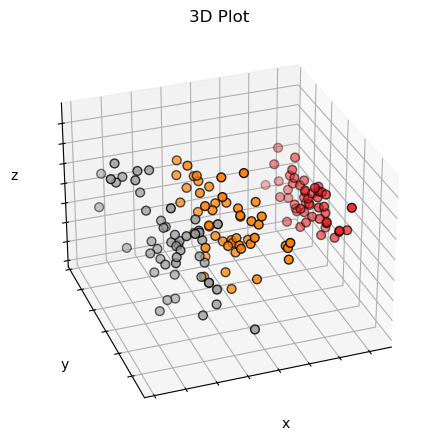

In [43]:
X_reduced = PCA(n_components=3).fit_transform(X)
fig = plt.figure(1, figsize=(6, 4))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,  
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("3D Plot")
ax.set_xlabel("x")# 1st eigenvector
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y") # 2nd eigenvector
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z") # 3rd eigenvector
ax.w_zaxis.set_ticklabels([])
plt.show()


Three clusters can be clearly seen, while the gray cluster and the orange cluster are somewhat intertwined, and the red cluster is far away from the other two clusters

g) Split the dataset into a training and testing set.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=42)

h) Fit an SVM to the training set. Evaluate the fitted SVM on the testing set by plotting the confusion matrix. Explain the kernel function you used and its parameters.

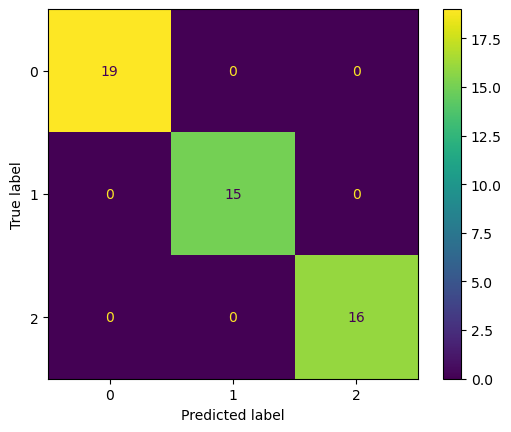

In [44]:
from sklearn import metrics

clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, predicted, labels = clf.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf.classes_)  # there are three classes #[False, True])
cm_display.plot()
plt.show()

# import seaborn as sns 
# sns.heatmap(confusion_matrix, annot=True)
# plt.title('Confusion matrix of the classifier')
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.show()

I used the RBF kernel method, it has a gamma parameter. I set it as 'auto', which means that I set the value of gamma to 1 / n_features.